In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import pickle

![esquema](esquema.png)

In [2]:
# Network Architecture
ILS = 1 #Input layer size
NL, LS = 5, 10 # Number of hidden layers and their size

# Initialize weights
def init_w(ils=ILS, nl=NL, ls=LS):
    nu = [ils] + [ls] * nl
    w = []
    for l in range(nl):
        w.append([])
        for i in range(nu[l]):
            w[l].append([])
            for j in range(nu[l+1]):
                w[l][i].append(2*(np.random.uniform()-.5)**1)
    w.append([[(2*(np.random.uniform()-.5))**1 for i in range(nu[nl])]])

        
    return w

# Import weights
def import_w(file):
    with open(file, 'rb') as f:
        w = pickle.load(f)
    return w
    
# Compute output
def compute_output(invals, w, activation_fun):
    # Input layer
    cl = np.array(invals)
    # Hidden layers
    for l in range(len(w)-1):
        #print(len(w[l][0]))
        cl = np.array([np.sum([w[l][i][j]*cl[i] for i in range(len(cl))]) for j in range(len(w[l][0]))])
        if activation_fun=='tanh':
            cl = np.tanh(cl)
        elif activation_fun=='ReLU':
            cl=[cl_i if cl_i>0 else 0 for cl_i in cl]
        elif activation_fun=='leaky_ReLU':
            cl=[cl_i if cl_i>0 else 0.01*cl_i for cl_i in cl]
            
        
    return(np.sum([w[-1][i][0] * cl[i] for i in range(len(w[-1]))]))

In [5]:
NREP = 10
d_all = pd.DataFrame({'x1' : [], 'y': [], 'rep': []})
d_all_raw = pd.DataFrame({'x1' : [], 'y_raw': [], 'rep': []})

activation_function='leaky_ReLU'

load_pickle=True
#load pickle
if load_pickle==True:
    filename = 'NN_weights_' + activation_function + '_NREP_10_.pickle'
    weights = import_w('../data/backup/' + filename)
    
elif load_pickle==False:
    #Initialize and save
    weights=[]
    
for rep in range(NREP):
    
    if load_pickle==True:
        #load pickle
        w=weights[rep]
                
    elif load_pickle==False:
        #initialize and save
        w = init_w(ils=ILS+1, nl=NL, ls=LS)
        weights.append(w)

    
    x1 = np.arange(-4, 4, 0.1)
    
    x1s, ys = [], []
    
    y = [compute_output([1, thisx1], w, activation_function) for thisx1 in x1]

    x1s=x1
    ys=y
    
    # Normalize y to [0, 1]
    ys = np.array(ys)
    
    ys_norm = (ys - min(ys)) / (max(ys) - min(ys) + 1e-15)

    print("minimum, maximum")
    #minimum
    display(min(ys))
    #maximum
    display(max(ys))
    
    d = pd.DataFrame({'x1' : x1s, 'y' : ys_norm, 'rep': rep})
    d_all=pd.concat([d_all,d])
    
    #Save non-normalized version
    d_raw = pd.DataFrame({'x1' : x1s, 'y_raw' : ys, 'rep': rep})
    d_all_raw=pd.concat([d_all_raw,d_raw])

    display(d_raw)
    display(d)
    
save=False
if save==True:
    with open('../data/backup_test/' + 'recovery_test_NN_weights_' + activation_function + '_NREP_' + str(NREP) + '_' + '.pickle', 'wb') as f:
        pickle.dump(weights, f, protocol=None)

    d_all.to_csv('../data/backup_test/' + 'recovery_test_NN_function_' + activation_function + '_NREP_' + str(NREP) + '_data.csv')
    d_all_raw.to_csv('../data/backup_test/' + 'recovery_test_Non_normalized_NN_function_' + activation_function + '_NREP_' + str(NREP) + '_data.csv')

minimum, maximum


0.00042643037745335253

0.024047016103513126

,x1,y_raw,rep
0,-4.0,0.000866,0
1,-3.9,0.000849,0
2,-3.8,0.000832,0
3,-3.7,0.000814,0
4,-3.6,0.000797,0
...,...,...,...
75,3.5,0.021973,0
76,3.6,0.022491,0
77,3.7,0.023010,0
78,3.8,0.023528,0


,x1,y,rep
0,-4.0,0.018628,0
1,-3.9,0.017893,0
2,-3.8,0.017157,0
3,-3.7,0.016422,0
4,-3.6,0.015687,0
...,...,...,...
75,3.5,0.912191,0
76,3.6,0.934143,0
77,3.7,0.956096,0
78,3.8,0.978048,0


minimum, maximum


-0.7173538800402421

0.0008536621610479347

,x1,y_raw,rep
0,-4.0,0.000854,1
1,-3.9,0.000802,1
2,-3.8,0.000750,1
3,-3.7,0.000698,1
4,-3.6,0.000646,1
...,...,...,...
75,3.5,-0.638043,1
76,3.6,-0.657871,1
77,3.7,-0.677698,1
78,3.8,-0.697526,1


,x1,y,rep
0,-4.0,1.000000,1
1,-3.9,0.999928,1
2,-3.8,0.999855,1
3,-3.7,0.999783,1
4,-3.6,0.999710,1
...,...,...,...
75,3.5,0.110429,1
76,3.6,0.082822,1
77,3.7,0.055214,1
78,3.8,0.027607,1


minimum, maximum


-2.6363526384613705

-0.5837642425957316

,x1,y_raw,rep
0,-4.0,-2.636353,2
1,-3.9,-2.590433,2
2,-3.8,-2.544513,2
3,-3.7,-2.498593,2
4,-3.6,-2.452674,2
...,...,...,...
75,3.5,-2.054302,2
76,3.6,-2.120957,2
77,3.7,-2.187612,2
78,3.8,-2.254267,2


,x1,y,rep
0,-4.0,0.000000,2
1,-3.9,0.022372,2
2,-3.8,0.044743,2
3,-3.7,0.067115,2
4,-3.6,0.089486,2
...,...,...,...
75,3.5,0.283569,2
76,3.6,0.251095,2
77,3.7,0.218622,2
78,3.8,0.186148,2


minimum, maximum


-21.358232633224873

0.0016781614750158013

,x1,y_raw,rep
0,-4.0,0.001678,3
1,-3.9,0.001636,3
2,-3.8,0.001594,3
3,-3.7,0.001552,3
4,-3.6,0.001509,3
...,...,...,...
75,3.5,-19.805050,3
76,3.6,-20.193345,3
77,3.7,-20.581641,3
78,3.8,-20.969937,3


,x1,y,rep
0,-4.0,1.000000,3
1,-3.9,0.999998,3
2,-3.8,0.999996,3
3,-3.7,0.999994,3
4,-3.6,0.999992,3
...,...,...,...
75,3.5,0.072715,3
76,3.6,0.054536,3
77,3.7,0.036357,3
78,3.8,0.018179,3


minimum, maximum


-3.025414239437336

-0.1168289724307876

,x1,y_raw,rep
0,-4.0,-0.116829,4
1,-3.9,-0.120618,4
2,-3.8,-0.124406,4
3,-3.7,-0.128195,4
4,-3.6,-0.131984,4
...,...,...,...
75,3.5,-2.752209,4
76,3.6,-2.820510,4
77,3.7,-2.888811,4
78,3.8,-2.957113,4


,x1,y,rep
0,-4.0,1.000000,4
1,-3.9,0.998697,4
2,-3.8,0.997395,4
3,-3.7,0.996092,4
4,-3.6,0.994790,4
...,...,...,...
75,3.5,0.093931,4
76,3.6,0.070448,4
77,3.7,0.046965,4
78,3.8,0.023483,4


minimum, maximum


-5.081383876475459

-0.3400247374043654

,x1,y_raw,rep
0,-4.0,-0.986591,5
1,-3.9,-0.961703,5
2,-3.8,-0.933587,5
3,-3.7,-0.902770,5
4,-3.6,-0.871953,5
...,...,...,...
75,3.5,-4.402449,5
76,3.6,-4.572183,5
77,3.7,-4.741916,5
78,3.8,-4.911650,5


,x1,y,rep
0,-4.0,0.863633,5
1,-3.9,0.868882,5
2,-3.8,0.874812,5
3,-3.7,0.881311,5
4,-3.6,0.887811,5
...,...,...,...
75,3.5,0.143194,5
76,3.6,0.107396,5
77,3.7,0.071597,5
78,3.8,0.035799,5


minimum, maximum


0.00487060781757479

0.03211338410372269

,x1,y_raw,rep
0,-4.0,0.016874,6
1,-3.9,0.016380,6
2,-3.8,0.015886,6
3,-3.7,0.015392,6
4,-3.6,0.014898,6
...,...,...,...
75,3.5,0.029714,6
76,3.6,0.030314,6
77,3.7,0.030913,6
78,3.8,0.031513,6


,x1,y,rep
0,-4.0,0.440614,6
1,-3.9,0.422476,6
2,-3.8,0.404338,6
3,-3.7,0.386201,6
4,-3.6,0.368063,6
...,...,...,...
75,3.5,0.911911,6
76,3.6,0.933933,6
77,3.7,0.955956,6
78,3.8,0.977978,6


minimum, maximum


0.22445336720183062

3.566490955382755

,x1,y_raw,rep
0,-4.0,3.566491,7
1,-3.9,3.480396,7
2,-3.8,3.392748,7
3,-3.7,3.305099,7
4,-3.6,3.217451,7
...,...,...,...
75,3.5,3.112981,7
76,3.6,3.190620,7
77,3.7,3.268258,7
78,3.8,3.345897,7


,x1,y,rep
0,-4.0,1.000000,7
1,-3.9,0.974239,7
2,-3.8,0.948013,7
3,-3.7,0.921787,7
4,-3.6,0.895561,7
...,...,...,...
75,3.5,0.864301,7
76,3.6,0.887532,7
77,3.7,0.910763,7
78,3.8,0.933994,7


minimum, maximum


0.002386905651012909

0.019371087322184444

,x1,y_raw,rep
0,-4.0,0.019191,8
1,-3.9,0.018575,8
2,-3.8,0.017965,8
3,-3.7,0.017363,8
4,-3.6,0.016761,8
...,...,...,...
75,3.5,0.017633,8
76,3.6,0.018069,8
77,3.7,0.018504,8
78,3.8,0.018940,8


,x1,y,rep
0,-4.0,0.989397,8
1,-3.9,0.953155,8
2,-3.8,0.917189,8
3,-3.7,0.881756,8
4,-3.6,0.846322,8
...,...,...,...
75,3.5,0.897664,8
76,3.6,0.923310,8
77,3.7,0.948956,8
78,3.8,0.974601,8


minimum, maximum


-4.386871647560334

-0.1974862825491649

,x1,y_raw,rep
0,-4.0,-1.292494,9
1,-3.9,-1.259016,9
2,-3.8,-1.225539,9
3,-3.7,-1.192062,9
4,-3.6,-1.158585,9
...,...,...,...
75,3.5,-3.954495,9
76,3.6,-4.062589,9
77,3.7,-4.170683,9
78,3.8,-4.278777,9


,x1,y,rep
0,-4.0,0.738623,9
1,-3.9,0.746614,9
2,-3.8,0.754605,9
3,-3.7,0.762596,9
4,-3.6,0.770587,9
...,...,...,...
75,3.5,0.103208,9
76,3.6,0.077406,9
77,3.7,0.051604,9
78,3.8,0.025802,9


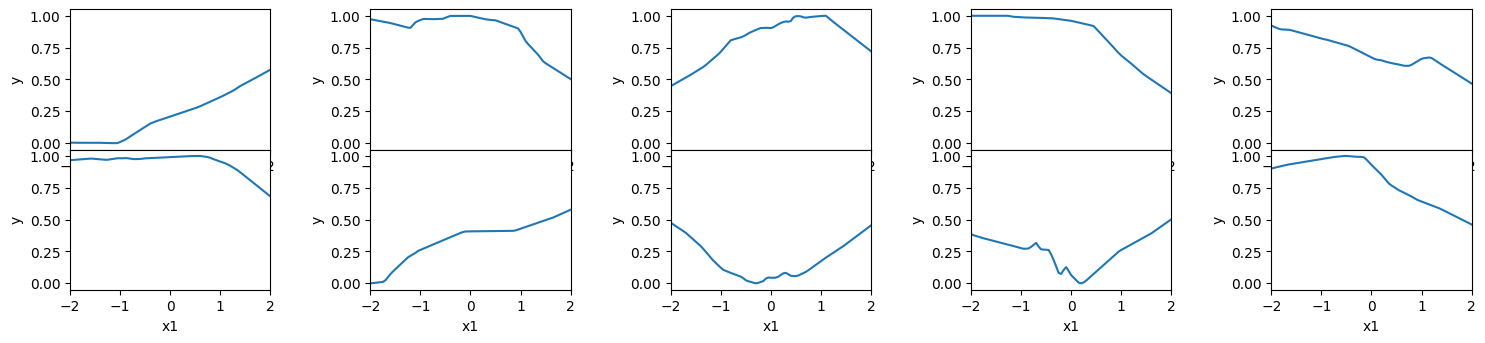

In [6]:
#PLOT -2,2

#Figure Size                                                                                                                                                                                                
cm = 1/2.54  # centimeters in inches                                                                                                                                                                        
width=40*cm;height=8*cm #Width and height of plots 
matplotlib.rcParams['figure.figsize'] = [width, height]

rows=2;cols=5
gs=gridspec.GridSpec(rows,cols)
gs.update(left=0.1,right=0.99,bottom=0.08,top=0.97,wspace=0.5,hspace=0.0)

#Plot train rank (-2,2)
h=0
for r in range(rows):
    for c in range(cols):
        ax_rc=plt.subplot(gs[r,c])
        d=d_all[d_all['rep']==h]
        ax_rc=sns.lineplot(data=d, x='x1', y='y')
        ax_rc.set_xlim(-2,2)
        h+=1
plt.savefig('../results/seminal_data/' + 'NN_function_' + activation_function + '_' + 'ILS%d_NL%d_LS%d'  %(ILS, NL,  LS) + '.png', dpi=300)

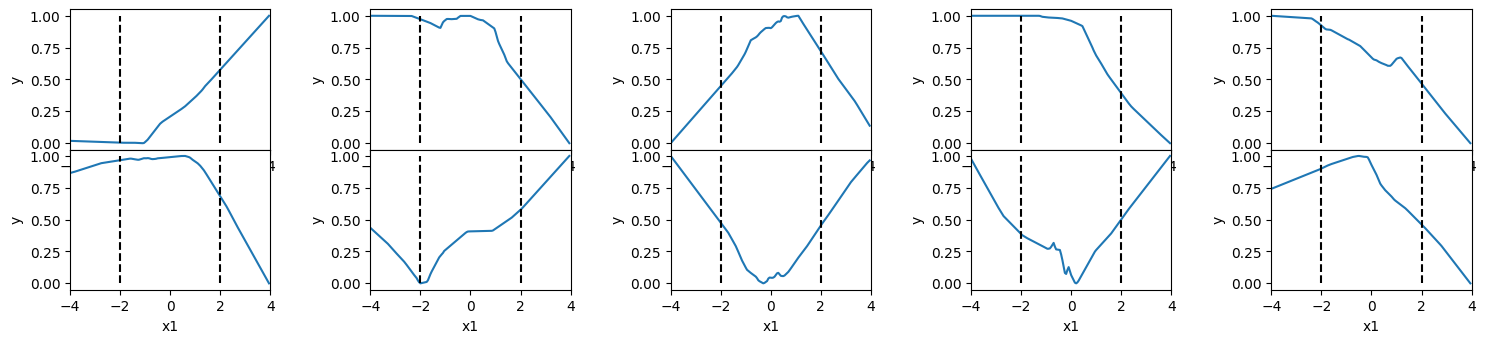

In [7]:
#PLOT FULL RANK (-4,4)

#Figure Size                                                                                                                                                                                                
cm = 1/2.54  # centimeters in inches                                                                                                                                                                        
width=40*cm;height=8*cm #Width and height of plots 
matplotlib.rcParams['figure.figsize'] = [width, height]

h=0
for r in range(rows):
    for c in range(cols):
        ax_rc=plt.subplot(gs[r,c])
        d=d_all[d_all['rep']==h]
        ax_rc=sns.lineplot(data=d, x='x1', y='y')
        ax_rc.vlines(x=[-2, 2], ymin=0, ymax=1, color='k',linestyle='--')
        ax_rc.set_xlim(-4,4)
        h+=1
plt.savefig('../results/seminal_data/' + 'NN_function_' + activation_function + '_' + 'ILS%d_NL%d_LS%d_full_rank'  %(ILS, NL,  LS) + '.png', dpi=300)      
#plt.show()